https://www.kaggle.com/code/adeelytics/house-price-prediction-regression

In [1]:
# 1. Setup & Data Loading
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
# Load without assuming first row is header
data = pd.read_csv('housing.csv', sep='\s+', header=None)

# Assign proper column names
data.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

In [2]:
# 2. Quick Peek at the Data
print(data.head())
print(data.describe())
print(data.columns)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

In [3]:

# 3. Train-Test Split
X = data.drop('MEDV', axis=1)   # features
y = data['MEDV']                # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# a. Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

rmse_lr = root_mean_squared_error(y_test, pred_lr)
r2_lr = r2_score(y_test, pred_lr)
residuals_lr = y_test - pred_lr

In [5]:
# b. Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
pred_ridge = model_ridge.predict(X_test)

rmse_ridge = root_mean_squared_error(y_test, pred_ridge)
r2_ridge = r2_score(y_test, pred_ridge)
residuals_ridge = y_test - pred_ridge

In [6]:
# c. Lasso Regression
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
pred_lasso = model_lasso.predict(X_test)

rmse_lasso = root_mean_squared_error(y_test, pred_lasso)
r2_lasso = r2_score(y_test, pred_lasso)
residuals_lasso = y_test - pred_lasso

In [7]:
# 5. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
pred_poly = model_poly.predict(X_test_poly)

rmse_poly = root_mean_squared_error(y_test, pred_poly)
r2_poly = r2_score(y_test, pred_poly)
residuals_poly = y_test - pred_poly

In [8]:
# 6. Compare Results
results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso", "Polynomial"],
    "RMSE": [rmse_lr, rmse_ridge, rmse_lasso, rmse_poly],
    "R-squared": [r2_lr, r2_ridge, r2_lasso, r2_poly]
})
print(results)

        Model      RMSE  R-squared
0      Linear  4.928602   0.668759
1       Ridge  4.947443   0.666222
2       Lasso  5.015535   0.656971
3  Polynomial  3.775889   0.805583


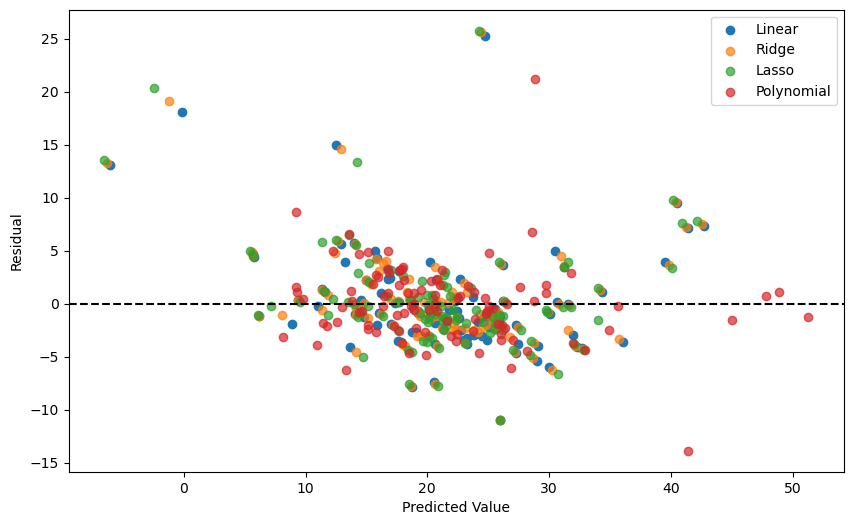

In [9]:
# 7. Residual Plot
plt.figure(figsize=(10,6))
plt.scatter(pred_lr, residuals_lr, label='Linear')
plt.scatter(pred_ridge, residuals_ridge, label='Ridge', alpha=0.7)
plt.scatter(pred_lasso, residuals_lasso, label='Lasso', alpha=0.7)
plt.scatter(pred_poly, residuals_poly, label='Polynomial', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.legend()
plt.show()